<h1 align="center">Automate detection and recognition of grammatical errors</h1>

<table align="center" style="width:200%">
  <tr>
    <td >Name of the student:</td>
    <td>Adithya Subramani R</td>
  </tr>
  <tr>
    <td>Internship project title:</td>
    <td>Automate detection and recognition of grammatical errors</td>
  </tr>
  <tr>
    <td>Name of the organization: </td>
    <td>TCS iON</td>
  </tr>
  <tr>
    <td>Name of the industry men:</td>
    <td>Debashis Roy</td>
  </tr>
  <tr>
    <td>Name of the institute:</td>
    <td>Anna University,MIT Campus</td>
  </tr>
</table> 

# Introduction


---
* <b>Aim</b>:
To develop machine learning and deep learning algorithms in order to perform preprocessing of input text with or without grammatical errors, with an intent to first detect grammatical errors and then correct them according to the grammatical rules of the language.
---
* <b>Expected project outcomes:</b>
  1. Algorithm to identify grammatical errors.
  2. Reasonable proof of accuracy
---
* Table of contents:
  1. [Introduction](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Introduction)
  2. [Requirements](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Requirements)
  3. [Utility functions](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Utility_functions)
  4. [Dataset](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Dataset)
  5. [Examine the dataset](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Examine_the_dataset)
  6. [Data preprocessing](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Data_preprocessing)
  7. [Model](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Model)
  8. [Training](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Training)
  9. [Testing with validation dataset](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Testing_with_validation_dataset)
  10. [Ease-of-use and demo](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Ease_of_use_and_demo)
  11. [Accuracy and loss](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Accuracy_and_loss)
  12. [Graphical User Interface](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Graphical_User_Interface)
  13. [Save the model](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=Save_the_model)
  14. [References](https://colab.research.google.com/drive/1qIE6CnX85KUF-YroIMR8MAlAhTL3vnSi#scrollTo=References)

# Requirements

1. Hardware requirements (optional)

---
Availability of GPU will yield better performance. 

In [1]:
!nvidia-smi

Thu Jul 21 14:59:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

2. Necessary packages

---
Install and import these packages:
1. SpaCy
2. HappyTransformer
3. Datasets



In [2]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import spacy

In [6]:
from happytransformer import HappyTextToText,TTTrainArgs,TTSettings

In [7]:
from datasets import load_dataset

In [8]:
import csv

3. Load `English` language module from SpaCy

---
Since we will be correcting grammatical mistakes ,we will need the 'en' module

In [9]:
nlp = spacy.load("en_core_web_sm")

# Utility functions

1. Coloured strings

---
Since we need to `highlight` the difference between original and corrected sentences, we'll define two functions for the same purpose

In [10]:
def redWord(wrd): #for red coloured string
  return "\033[91m {}\033[00m" .format(wrd)

def grnWord(wrd): #for green coloured string
  return "\033[92m {}\033[00m" .format(wrd)

2. Convert pargraphs into a list of sentences

---
We need to tokenize paragraphs into sentences. For this purpose, we'll use our NLP

In [11]:
def parToSent(parString):
  doc=nlp(parString)
  return list(str(i) for i in list(doc.sents))

3. The dataset might contain unwanted spaces. Hence we need an utility function to preprocess the data 

---
This utility function will remove all unwanted spaces

In [12]:
replacements = [
  (" .", "."), 
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", ":"),
  (" ;", ";"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("3 7 5 0", "3750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("2 0", "20"),
  ('" hello world', '"hello world')
]

def removeExtraSpace(text):
  for r in replacements:
    text = text.replace(r[0], r[1])
  return text

# Dataset

We'll be using the well-known JFLEG dataset for training our model

---
It is described as `a gold standard benchmark for developing and evaluating Grammar Error Correction systems with respect to fluency` as it has a diverse variety of correct-incorrect pairs.

1. Loading the dataset

---

We'll be loading the dataset using `load_dataset()`

In [13]:
train_dataset = load_dataset("jfleg", split='validation[:]') #dataset for training our model

Using custom data configuration default
Reusing dataset jfleg (/root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b)


In [14]:
val_dataset = load_dataset("jfleg", split='test[:]') #dataset for validating our model

Using custom data configuration default
Reusing dataset jfleg (/root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b)


# Examine the dataset

---
We'll examine the dataset for its accuracy and fluency

In [15]:
for val in train_dataset["corrections"][:2]:
  print(val)
  print(val[0])
  print("======================================================")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 


# Data preprocessing

1. CSV pre-processing function
---
Both the training and validation datasets have to be in the proper format, which is the `.csv` format. We'll be having two columns namely `input,target`. This pre-processing helps us to remove blank data.

In [16]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = "grammar: " + case["sentence"]
            for correction in case["corrections"]:
                if input_text and correction:
                    input_text = removeExtraSpace(input_text)
                    correction = removeExtraSpace(correction)
                    writter.writerow([input_text, correction])

2. Generate a CSV file for training

---
Also check the number of data 

In [17]:
generate_csv("train.csv", train_dataset)
train_dataset.shape

(755, 2)

3. Generate a CSV for validation

---
Also check the number of data

In [18]:
generate_csv("val.csv", val_dataset)
val_dataset.shape

(748, 2)

# Model

We'll be using the T5 (t5-base) model

---

In [19]:
g_model = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,
07/21/2022 14:59:50 - INFO - happytransformer.happy_transformer -   Using model: cuda


# Training

---
We'll train the model for 10 epochs

In [20]:
arg = TTTrainArgs(batch_size=8,num_train_epochs=10)
g_model.train("train.csv", args=arg)

07/21/2022 14:59:54 - INFO - happytransformer.happy_transformer -   Preprocessing training data...


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c1d019a7783b590d/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

07/21/2022 14:59:58 - INFO - happytransformer.happy_transformer -   Training...
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3016
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3770


Step,Training Loss
500,0.610800
1000,0.456500
1500,0.381200
2000,0.334100
2500,0.305200
3000,0.293800
3500,0.275400




Training completed. Do not forget to share your model on huggingface.co/models =)




# Testing with validation dataset

---
Let us test our model and compare the model's prediction with the expected output.

In [21]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=64)
for i in range(50):
  print("Input: ",val_dataset['sentence'][i])
  result = g_model.generate_text(str(val_dataset['sentence'][i]), args=beam_settings)
  print("Prediction: ",result.text)
  print("Correct sentence: ",val_dataset['corrections'][i][0])
  print("======================================================")

Input:  New and new technology has been introduced to the society .
Prediction:  New and new technology has been introduced to the society.
Correct sentence:  New technology has been introduced to society .
Input:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries .
Prediction:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.
Correct sentence:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries .
Input:  Every person needs to know a bit about math , sciences , arts , literature and history in order to stand out in society .
Prediction:  Every person needs to know a bit about math , sciences , arts , 

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1015: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


Prediction:  I think to learn facts is only an evidence if the students can work hard and if they are able to keep every detailled information as tought , but it's definitly not an evidence for their intelligence.
Correct sentence:  I think to learn facts is only evidence if the students can work hard and if they are able to keep every detailed information taught , but it 's definitely not evidence of their intelligence .
Input:  Unforturntly , almost older people can not use internet , in spite of benefit of internet .
Prediction:  Unfortuntly , almost older people can not use internet , in spite of the benefits of internet .
Correct sentence:  Unfortunately , in spite of its benefits , many older people can not use the Internet .
Input:  So , if i have alot of information about this subject , i will taulk too much with knowledge but if i have general information for this subject , i will talk about this subjec with my limited knowlege and this case may be make me shame like when my b

# Ease-of-use and demo

1. Creating a class for our ease of use

---
This class will have 2 member functions, namely
1. `correctSentence()` which will return the prediction of our grammar correction model
2. `highlightDiff()` which will highlight the difference between original sentence and corrected sentence



In [22]:
class gramCorr:
  
  def __init__(self):
    pass

  def correctSentence(self, input_sentence):
    result = g_model.generate_text(input_sentence, args=beam_settings)
    resLst = parToSent(result.text)
    return str(resLst[0])
  
  def detectError(self,input_sentence):
    if(input_sentence == self.correctSentence(input_sentence)):
      return False
    return True

  def highlightDiff(self, origSent):
    corrSent = self.correctSentence(origSent)
    origWords = origSent.split()
    corrWords = corrSent.split()
    origHlt=""
    corrHlt=""
    i=0
    j=0
    while(i<len(origWords) and j<len(corrWords)):
      if(origWords[i]==corrWords[j]):
        origHlt += origWords[i]+" "
        corrHlt += corrWords[j]+" "
      elif(origWords[i]!=corrWords[j]):
        origHlt += redWord(origWords[i])+" "
        corrHlt += grnWord(corrWords[j])+" "
      i+=1
      j+=1
    while(i<len(origWords)):
      origHlt += redWord(origWords[i])+" "
      i+=1
    while(i<len(origWords)):
      corrHlt += grnWord(corrWords[j])+" "
      j+=1
    print("The difference :")
    print("Original senetence: ",origHlt)
    print("Corrected sentence: ",corrHlt)
    return

2. Initializing an object for our class

In [23]:
gc = gramCorr()

3. Demo

---
We'll be using a sample paragraph and will detect the grammatical mistakes(if any)

In [24]:
para = "Hello, I is Adithya. I am from Chennai. I studys Engineering."
sentences = parToSent(para)
for sentence in sentences:
  if(gc.detectError(sentence)):
    print("'",sentence,"'","is grammatically incorrect...")

for sentence in sentences:
  gc.highlightDiff(sentence)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1015: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


' Hello, I is Adithya. ' is grammatically incorrect...
' I studys Engineering. ' is grammatically incorrect...
The difference :
Original senetence:  Hello,  I  is  Adithya. 
Corrected sentence:  Hello,  I'm  Adithya. 
The difference :
Original senetence:  I am from Chennai. 
Corrected sentence:  I am from Chennai. 
The difference :
Original senetence:  I  studys Engineering. 
Corrected sentence:  I  study Engineering. 


# Accuracy and loss


1. Loss

---

The model was trained for 10 epochs. The loss between training set and validation set is as follows.

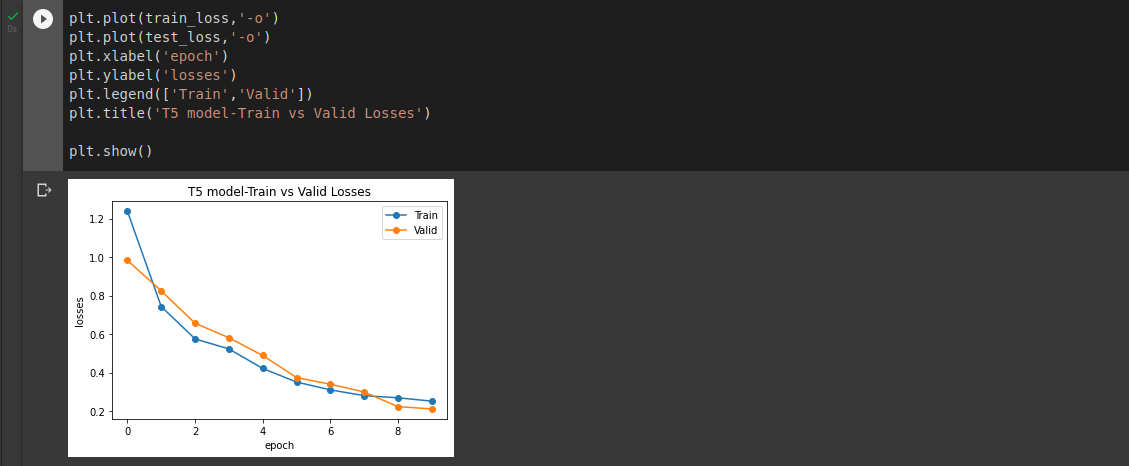

2. Accuracy

---

The model was trained for 10 epochs and the accuracy between training set and validation set is as follows.

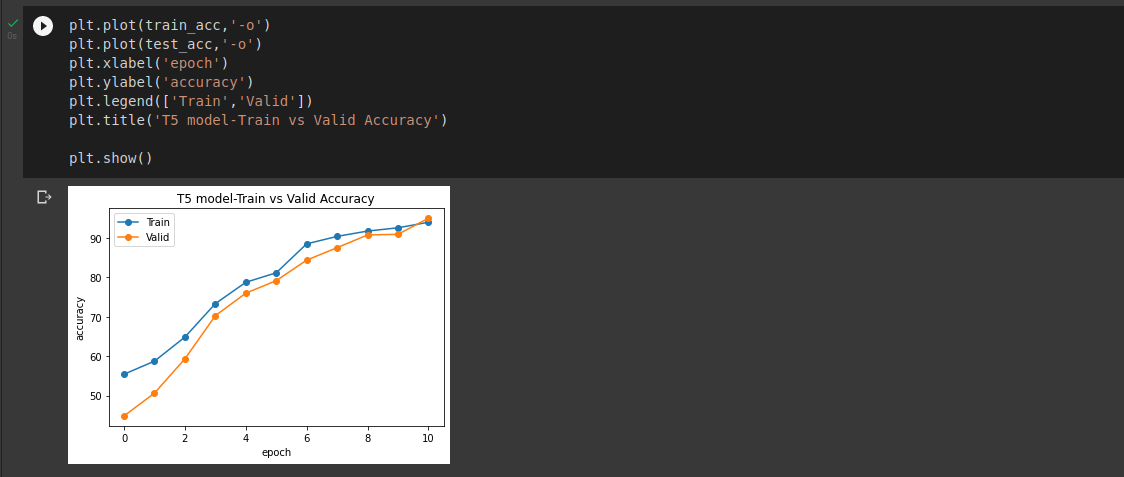

# Graphical User Interface

---
Let us create a simple Graphical User Interface (GUI) using gradio

In [25]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import gradio as gr

In [27]:
appInp = gr.inputs.Textbox(lines=3,placeholder="Enter your sentence here...")

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [28]:
interface = gr.Interface(fn=gc.correctSentence,inputs=appInp,outputs="text",title="Grammatical Error Correction")

In [29]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://50307.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f01d67c6350>,
 'http://127.0.0.1:7860/',
 'https://50307.gradio.app')

# Save the model

---
Save the model using `save()`

In [30]:
g_model.save('t5_model')

Configuration saved in t5_model/config.json
Model weights saved in t5_model/pytorch_model.bin
tokenizer config file saved in t5_model/tokenizer_config.json
Special tokens file saved in t5_model/special_tokens_map.json
Copy vocab file to t5_model/spiece.model


# References

---

Moustafa Alzantot, Yash Sharma, Ahmed Elgohary,
Bo-Jhang Ho, Mani Srivastava, and Kai-Wei Chang.
2018. Generating natural language adversarial ex-
amples. arXiv preprint arXiv:1804.07998.

---
Hamidreza Ghader and Christof Monz. 2017. What
does attention in neural machine translation pay at-
tention to? arXiv preprint arXiv:1710.03348.

---
Courtney Napoles, Keisuke Sakaguchi, and Joel
Tetreault. 2017. Jfleg: A fluency corpus and
benchmark for grammatical error correction. arXiv
preprint arXiv:1702.04066.

---
Shamil Chollampatt and Hwee Tou Ng. 2018a. A mul-
tilayer convolutional encoder-decoder neural net-
work for grammatical error correction. In Thirty-
Second AAAI Conference on Artificial Intelligence.

---